In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
import numpy as np

import sklearn
from sklearn.preprocessing import *

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# 1. Data Set Description

https://www.dacon.io/competitions/official/235713/talkboard/402821/

1. index  
2. gender: 성별  
3. car: 차량 소유 여부  
4. reality: 부동산 소유 여부
5. child_num: 자녀 수
6. income_total: 연간 소득
7. income_type: 소득 분류    ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
8. edu_type: 교육 수준    ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
9. family_type: 결혼 여부    ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
10. house_type: 생활 방식    ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
11. DAYS_BIRTH: 출생일  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
12. DAYS_EMPLOYED: 업무 시작일  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 양수 값은 고용되지 않은 상태를 의미함
13. FLAG_MOBIL: 핸드폰 소유 여부
14. work_phone: 업무용 전화 소유 여부
15. phone: 전화 소유 여부
16. email: 이메일 소유 여부
17. occyp_type: 직업 유형													
18. family_size: 가족 규모
19. begin_month: 신용카드 발급 월	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
20. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도	=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [2]:
raw = pd.read_csv("train.csv", encoding="UTF8")
data = raw.copy()

In [3]:
import pandas as pd
import pandas_profiling
pr = data.profile_report()
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.head()

df_index gender car reality  child_num  income_total           income_type  \
0         0      F   N       N          0      202500.0  Commercial associate   
1         1      F   N       Y          1      247500.0  Commercial associate   
2         2      M   Y       Y          0      450000.0               Working   
3         3      F   N       Y          0      202500.0  Commercial associate   
4         4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   df_index       26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### data.info()에는 결측치가 없다고 나오지만 occyp_type변수에 결측치가 존재하는것 처럼 보입니다.  
(실제로는 결측치는 없습니다.)  
첫번째 data를 보면 NaN으로 되어 있고  
또한 data.profile_report() 에서도 Missing Value로 인식 되는 부분이 있습니다.  
이는 범주형 변수의 경우 data.info()에서 NaN역시 범주형 데이터로 판단하여 결측치로 인식하지 못하기 때문입니다.  
따라서 결측치의 개수를 파악하고 적절하게 대체하거나 제거해 주어야 합니다.  
즉, 범주형의 경우 직접 확인하는것이 안전합니다.

### 1. 결측치 확인
범주형 데이터는 직접 확인해주는 것이 안전합니다.  
예를들어 단위가 있는 데이터의 경우에는 data.info()로는 결측치 확인이 불가능 합니다. 

In [6]:
data.occyp_type.unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

`occyp_type`변수를 보면 nan이 결측치라고 생각 할 수 있으나 이는 무직이라고 보는 것이 맞습니다.  
즉 `occyp_type`는 결측치가 없습니다.   
이어서 나머지 범주형 변수들도 모두 확인 해 줍니다 .

In [7]:
a = 0
for column in data.columns:
    if data[column].dtypes == object: 
        print(f"{column} : {data[column].unique()}")
        print( len(data[column].unique()) )
        print('='*80)
        a += 1
print(f"number of categorical variables is {a}")

gender : ['F' 'M']
2
car : ['N' 'Y']
2
reality : ['N' 'Y']
2
income_type : ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
5
edu_type : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
5
family_type : ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
5
house_type : ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
6
occyp_type : [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']
19
number of categorical variables is 8


결측치가 없는것을 확인 할 수 있습니다.

Data를 보면 총 변수 20개중 `credit`변수는 target입니다.  
나머지 19개 변수중 범주형으로 되어 있는 변수는 8개이고 나머지 11개의 변수는 양적변수로 인식 됩니다.    
하지만 11개의 변수 중에서도 type은 숫자이지만 범주형 변수인 것이 있습니다.   
`FLAG_MOBIL`, `work_phone`, `phone`, `email`는 소유여부를 0, 1로 나타나 있기 때문에 이를 범주형으로 바꿔줘야 합니다. 

### 2. 수치 -> 범주형 변수 변환

In [8]:
trans_= {0: 'N', 1 : 'Y'}
data.replace({'FLAG_MOBIL': trans_, 'work_phone': trans_, 
              'phone': trans_, 'email': trans_ }, inplace=True)



In [9]:
data.head(6)

df_index gender car reality  child_num  income_total           income_type  \
0         0      F   N       N          0      202500.0  Commercial associate   
1         1      F   N       Y          1      247500.0  Commercial associate   
2         2      M   Y       Y          0      450000.0               Working   
3         3      F   N       Y          0      202500.0  Commercial associate   
4         4      F   Y       Y          0      157500.0         State servant   
5         5      F   N       Y          2      270000.0               Working   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   
5  Secondary / secondary special         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED FLAG_MOBIL work_phone phone email  \
0      -13899          -4709          Y          N     N     N   
1      -11380          -1540          Y          N     N     Y   
2      -19087          -4434          Y          N     Y     N   
3      -15088          -2092          Y          N     Y     N   
4      -15037          -2105          Y          N     N     N   
5      -13413          -4996          Y          N     N     Y   

              occyp_type  family_size  begin_month  credit  
0                    NaN          2.0         -6.0     1.0  
1               Laborers          3.0         -5.0     1.0  
2               Managers          2.0        -22.0     2.0  
3            Sales staff          2.0        -37.0     0.0  
4               Managers          2.0        -26.0     2.0  
5  High skill tech staff          4.0        -18.0     1.0

마지막으로 df_index 변수는 삭제 합니다.

In [10]:
data = data.drop('df_index',axis=1)

In [11]:
# 다시 한번 더 확인해 줍니다.
a = 0
for column in data.columns:
    if data[column].dtypes == object: 
        print(f"{column} : {data[column].unique()}")
        print( len(data[column].unique()) )
        print('='*80)
        a += 1
print(f"number of categorical variables is {a}")

gender : ['F' 'M']
2
car : ['N' 'Y']
2
reality : ['N' 'Y']
2
income_type : ['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
5
edu_type : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
5
family_type : ['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
5
house_type : ['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
6
FLAG_MOBIL : ['Y']
1
work_phone : ['N' 'Y']
2
phone : ['N' 'Y']
2
email : ['N' 'Y']
2
occyp_type : [nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']
19
number of categorical variables is 12


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  object 
 12  work_phone     26457 non-null  object 
 13  phone          26457 non-null  object 
 14  email          26457 non-null  object 
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

# 2. EDA

### 1. 기초통계량을 확인합니다.

In [13]:
data.describe()

child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED   family_size  \
count  26457.000000  2.645700e+04  26457.000000   26457.000000  26457.000000   
mean       0.428658  1.873065e+05 -15958.053899   59068.750728      2.196848   
std        0.747326  1.018784e+05   4201.589022  137475.427503      0.916717   
min        0.000000  2.700000e+04 -25152.000000  -15713.000000      1.000000   
25%        0.000000  1.215000e+05 -19431.000000   -3153.000000      2.000000   
50%        0.000000  1.575000e+05 -15547.000000   -1539.000000      2.000000   
75%        1.000000  2.250000e+05 -12446.000000    -407.000000      3.000000   
max       19.000000  1.575000e+06  -7705.000000  365243.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean     -26.123294      1.519560  
std       16.559550      0.702283  
min      -60.000000      0.000000  
25%      -39.000000      1.000000  
50%      -24.000000      2.000000  
75%      -12.000000      2.000000  
max        0.000000      2.000000

### 2. target(credit ; 신용도)변수의 분포를 확인합니다.

<AxesSubplot:ylabel='credit'>

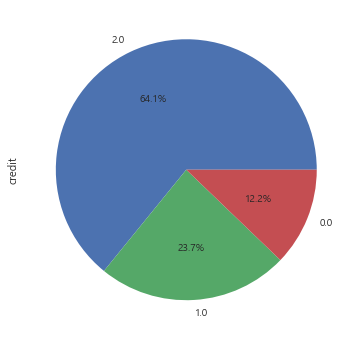

In [14]:
%matplotlib inline
plt.figure(figsize=(9,6))
data['credit'].value_counts().plot.pie(autopct='%1.1f%%')

target 변수의 분포는 편향되어있음을 확인 할 수 있습니다.

### 3. 수치형 변수의 분포를 확인해 줍니다. 

In [15]:
num_feature = ['child_num', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED','family_size', 'begin_month']

In [16]:
cate_feature = ['gender', 'car', 'reality','income_type', 'edu_type', 'family_type', 'house_type', 
       'FLAG_MOBIL', 'work_phone', 'phone', 'email','occyp_type']


Text(0.5, 0.98, 'Histogram (Numerical Variables)')

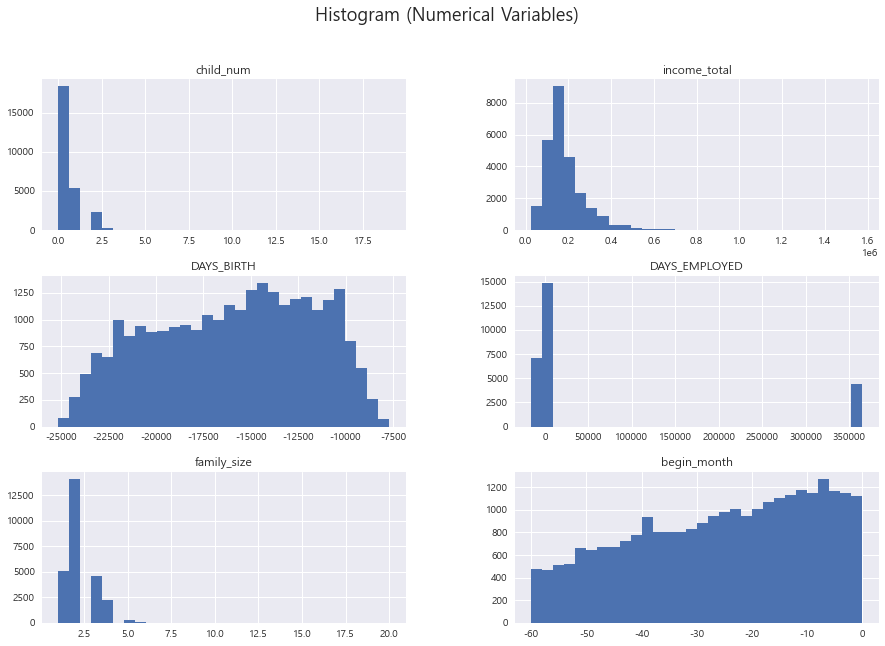

In [17]:
data[num_feature].hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram (Numerical Variables)", fontsize=18)

이상치가 있어 보입니다.  
`Days_Emplyed`와 `child_num , family_size`가 이상해 보입니다.

### 4. `Days_Employed` 변수
변수 설명에서 DAYS_EMPLOYED변수는 DAYS_BIRTH와 마찬 가지로 데이터 수집일을 기준으로 -1은 하루 전에 고용된 상태를 의미합니다.  
반대로 양수는 고용되지 않은 상태를 의미합니다.  
즉, 위의 Histogram에서 양수는 무직을 의미 하므로 이는 0 으로 바꾸어 주는 것이 맞습니다.

In [18]:
(data.DAYS_EMPLOYED>0).sum()

4438

총 4,438명의 데이터가 양수이므로 이를 0으로 바꾸어 주어야 합니다.  
다만 어떠한 이유로 이미 0 이 있을수 있습니다.  
이런 경우에는 추가 작업이 필요하므로 한번더 확인해 줍니다.

In [19]:
(data.DAYS_EMPLOYED==0).sum()

0

다행이도 원래 0 은 없으므로 양수를 0 으로 바꾸어 주어 양적 데이터의 의미를 보강합니다.

In [20]:
# boolean을 이용하여 양수이면 0을 곱하게 합니다.
data.DAYS_EMPLOYED = data.DAYS_EMPLOYED * (data.DAYS_EMPLOYED<0)

Text(0.5, 0.98, 'Histogram (Numerical Variables)')

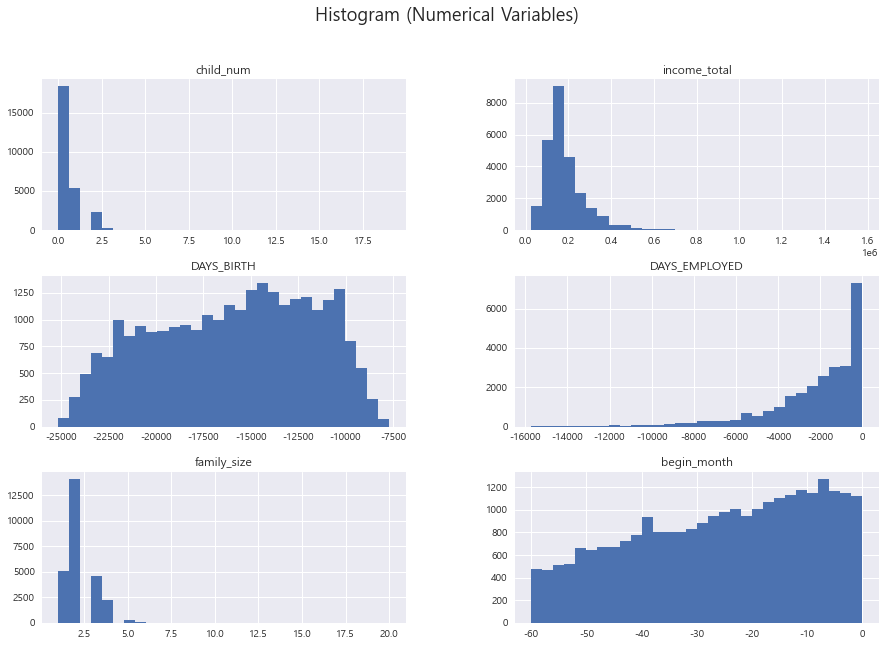

In [21]:
# 다시한번 확인해 줍니다.
data[num_feature].hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram (Numerical Variables)", fontsize=18)

잘 바뀐것을 확인할 수 있습니다.

#### Assumption : 고용일수가 오래 될 수록 신용등급이 좋을 것이라고 예상할 수 있습니다.

두 변수를 정규화 하여 분포를 확인합니다.

(array([[   45.,    48.,   120.,   272.,   478.,   827.,  1538.,  3323.,
          6381., 13425.],
        [    0.,     0.,     0.,     0.,     0.,  3222.,     0.,  6267.,
             0., 16968.]]),
 array([-5.70197011, -5.03901364, -4.37605717, -3.7131007 , -3.05014423,
        -2.38718776, -1.72423129, -1.06127482, -0.39831835,  0.26463812,
         0.92759459]),
 <a list of 2 BarContainer objects>)

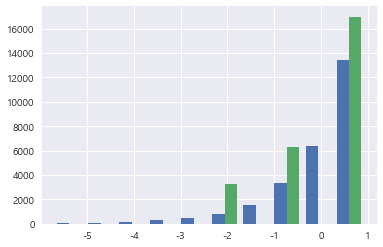

In [22]:
x = (data.DAYS_EMPLOYED - data.DAYS_EMPLOYED.mean())/data.DAYS_EMPLOYED.std()
y = (data.credit - data.credit.mean())/data.credit.std()
plt.hist([x,y])

비슷한 분포를 가지고 있음을 알 수 있습니다.

credit 별로 DAYS_EMPLOYED의 평균을 구해 봅니다.

In [23]:
print(data[data.credit == 0].DAYS_EMPLOYED.mean())
print(data[data.credit == 1].DAYS_EMPLOYED.mean())
print(data[data.credit == 2].DAYS_EMPLOYED.mean())

-2165.094972067039
-2072.5323121110578
-2251.4144271570012


별 차이가 없는것을 확인할 수 있습니다.  
즉, 고용일수가 오래 될수록 신용도가 좋지는 않습니다.

### 5. `occyp_type`변수 확인 (with DAYS_EMPLOYED)

앞에서 결측치 확인을 할 때 `occyp_type`의 nan은 무직이라고 하였습니다.  
그렇다면 `DAYS_EMPLOYED`와 일치해야 합니다.  
이를 확인합니다.

In [24]:
cnt = 0
for i in data.occyp_type:
    if pd.isna(i):
        cnt += 1
print(cnt)

8171


nan의 개수를 세본 결과 nan이 Days_Employed==0 보다 많습니다.  
그럼 다음의 결론을 얻을 수 있습니다.  

Days_Employed==0 은 확실하게 무직입니다.  
nan은 무직 + 해당 범주에 없는 직업 입니다.

이를 한번 더 확인해 보겠습니다.  
즉, Days_Employed==0 이면 확실하게 nan이어야 합니다. 

In [25]:
x = data[data.DAYS_EMPLOYED == 0]
print(len(x))
y = x[pd.isna(x.occyp_type)]
print(len(y))

4438
4438


### 결론 :  
occyp_type이 nan인것은 무직 + 범주에 없는 직업 입니다.  
DAYS_EMPLOYED == 0 인 것은 확실하게 무직입니다.

#### Assumption : 무직인 사람은 신용도가 좋지 못할 것이다.

In [26]:
def count_plot(data, feature):
    plt.figure(figsize=(9,6))
    g1 = sns.countplot(data = data, x = feature)
    g1.set_title(f"{feature} Distribution")
    plt.show()

In [27]:
def bar_plot(data, feature):
    plt.figure(figsize=(9,6))
    g2 = sns.barplot(x=data[feature],y=data['credit'])
    g2.set_title(f"{feature} Distribution by Credit")
    plt.xticks(rotation=45)
    plt.show()

In [28]:
data_ = data.copy()
data_.DAYS_EMPLOYED = data_.DAYS_EMPLOYED.apply(lambda x: -1 if x!= 0 else x)   # 무직과 직장이 있는 사람으로 나눕니다.

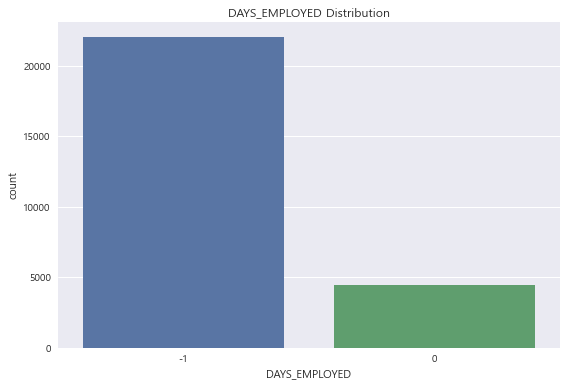

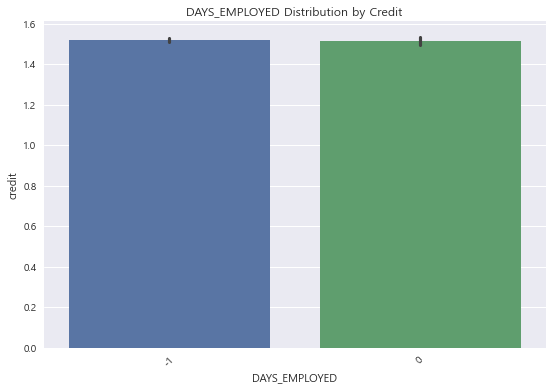

In [29]:
count_plot(data_, "DAYS_EMPLOYED")
bar_plot(data_, "DAYS_EMPLOYED")

직장이 있는 사람과 없는 사람의 신용도가 차이나지 않는 것을 알 수 있습니다.

### 6. `Family_size`와  `child_num`
#### Assumption 두 변수간의 차이가 거의 없으며 가족원이 많을 수록 신용도가 높을 것이다.

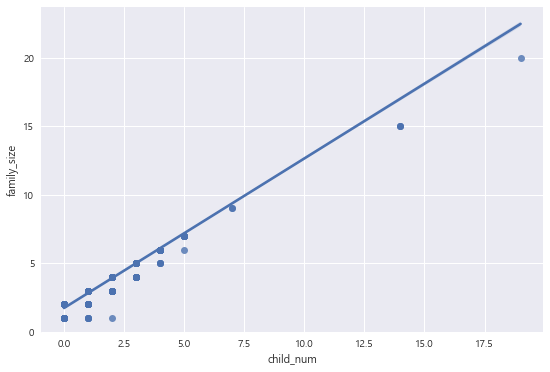

In [30]:
plt.figure(figsize=(9,6))
g2 = sns.regplot(x=data.child_num,y=data.family_size)
plt.show()

자연스럽게 자녀수가 많아질 수록 가족원수가 많아지는 것을 확인 할 수 있습니다.

위에서 언급만 하고 넘어 갔는데 확실한 이상치가 보입니다.  
이를 제거합니다.

In [31]:
# 이상치 제거
data = data[data.child_num < 10]

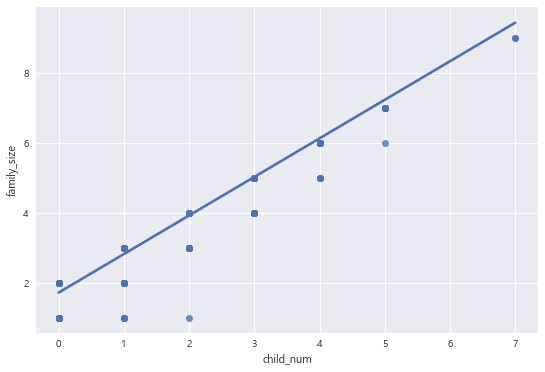

In [32]:
plt.figure(figsize=(9,6))
g2 = sns.regplot(x=data.child_num,y=data.family_size)
plt.show()

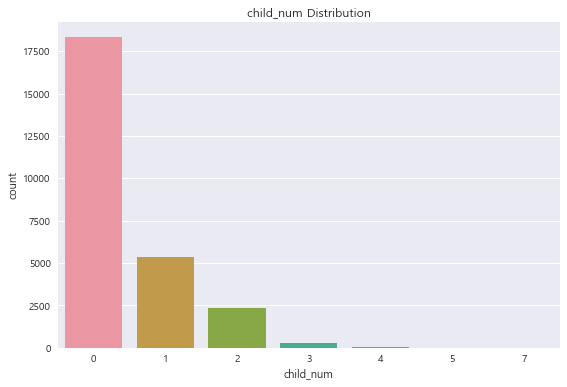

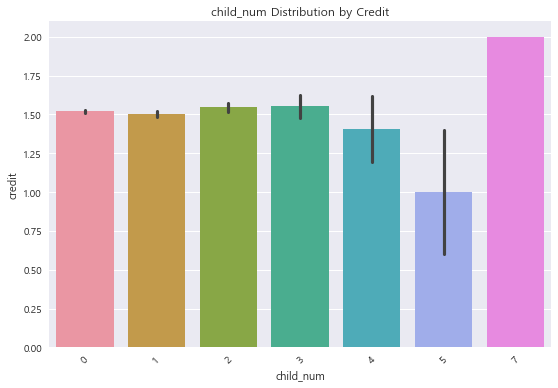

In [33]:
count_plot(data, "child_num")
bar_plot(data, "child_num")

두 변수간의 차이가 없으나 신용도에는 영향을 주지 않습니다.

### 7. `income_total`변수

#### Assumption  : 신용도가 좋을 수록 수입이 많을 것이다.

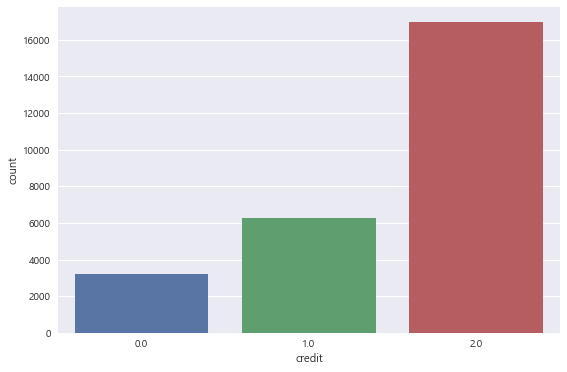

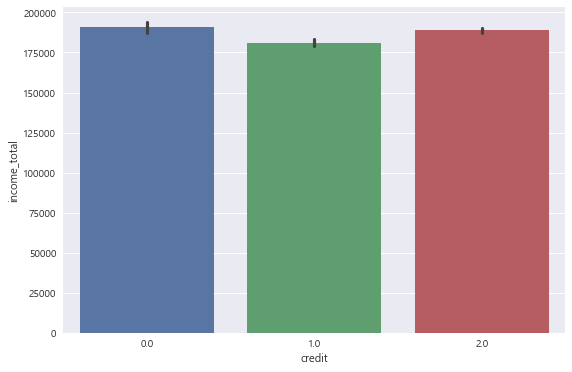

In [34]:
plt.figure(figsize=(9,6))
g1 = sns.countplot(data = data, x = data['credit'])
plt.show()

plt.figure(figsize=(9,6))
g2 = sns.barplot(y=data.income_total,x=data['credit'])
plt.show()

신용도에 따른 수입차이는 없고 오히려 신용도가 낮은2가 신용도가 높은1보다 소득수준이 높았습니다.

### 8. 수치형 변수든 간의 상관관계를 파악합니다.

<AxesSubplot:>

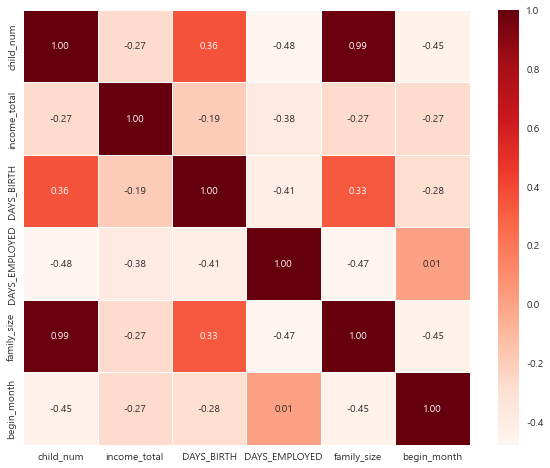

In [35]:
X = data[num_feature].corr()
plt.figure(figsize=(10,8))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

### 9. `car, reality, income_total`
#### Assumption : 부동산을 가지고 있는 사람의 대부분은 자동차를 가지고 있을 것이다. 또한 둘다 있는 사람의 소득이 더 놓을 것이다.

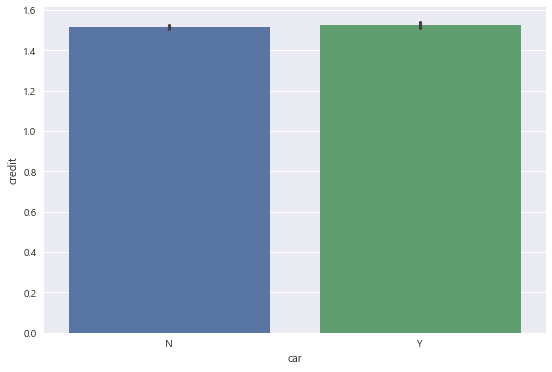

In [87]:
x = data[data.car == 'Y']
y = x[x.reality == 'Y']
z = x[x.reality == 'N']
print(f"자동차를 소유한 사람 :{len(x)}명 중 부동산을 소유한 사람 {len(y)}명 아닌사람 {len(z)}명")
print(f'따라서 자동차를 소유한 사람중 {round(len(y)/len(x),3)*100}%는 부동산을 소유하고 있음.')

자동차를 소유한 사람 :10044명 중 부동산을 소유한 사람 6668명 아닌사람 3376명
따라서 자동차를 소유한 사람중 66.4%는 부동산을 소유하고 있음.


In [88]:
x = data[data.reality == 'Y']
y = x[x.car == 'Y']
z = x[x.car == 'N']
print(f"부동산을 소유한 사람 :{len(x)}명 중 자동차을 소유한 사람 {len(y)}명 아닌사람 {len(z)}명")
print(f'따라서 부동산을 소유한 사람중 {round(len(y)/len(x),3)*100}%는 자동차을 소유하고 있음.')

부동산을 소유한 사람 :17826명 중 자동차을 소유한 사람 6668명 아닌사람 11158명
따라서 부동산을 소유한 사람중 37.4%는 자동차을 소유하고 있음.


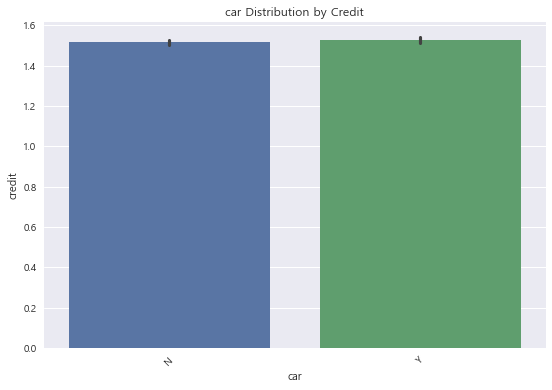

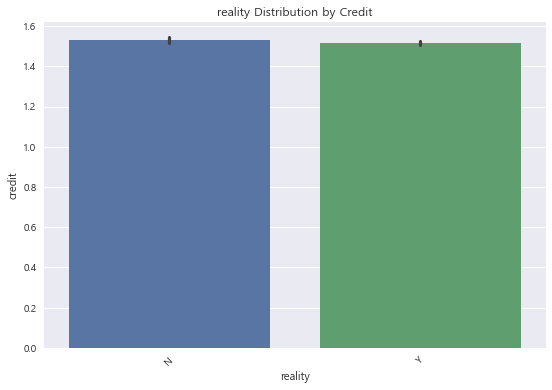

In [90]:
bar_plot(data,"car")
bar_plot(data,"reality")

차이가 거의 없습니다.

### 10. `income_type, edu_type, income_total`

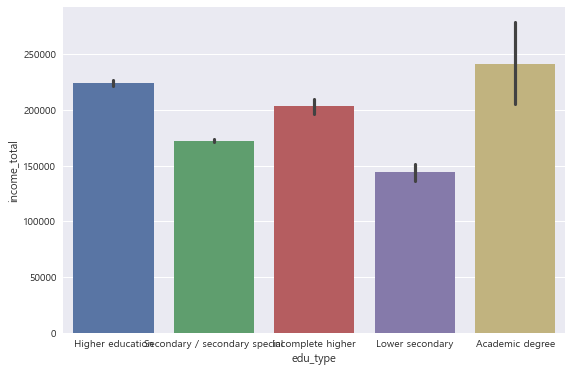

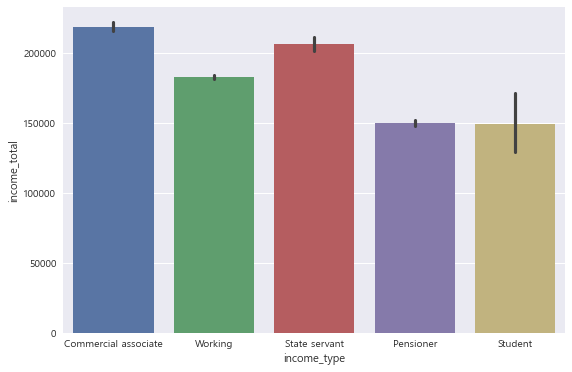

In [102]:
plt.figure(figsize=(9,6))
g2 = sns.barplot(x=data['edu_type'],y=data['income_total'])
plt.show()

plt.figure(figsize=(9,6))
g2 = sns.barplot(x=data['income_type'],y=data['income_total'])
plt.show()

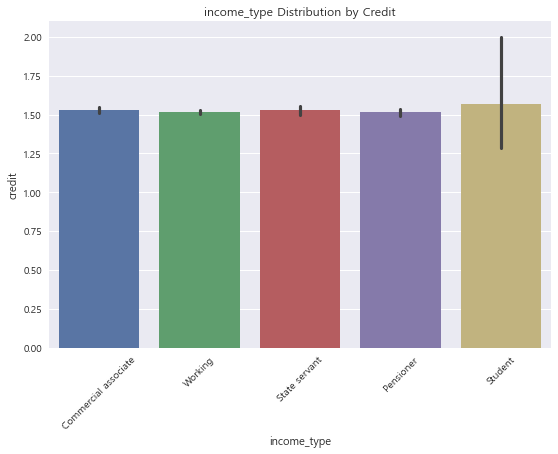

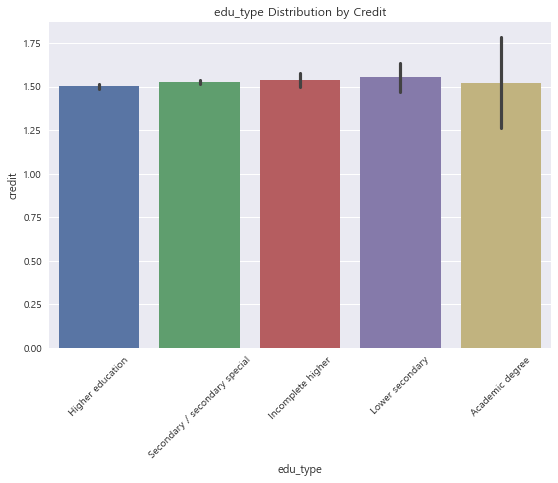

In [99]:
bar_plot(data,"income_type")
bar_plot(data,"edu_type")

교육수준과 수입 유형별로 확실한 수입차이가 확실하게 보입니다.  
하지만 이는 신용도에는 영향을 주지 못하는 것으로 나타납니다.